# Dataset Introduction
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

# About the data (Description of attributes)
1. age: Age of the patient
2. anaemia: Haemoglobin level of patient (Boolean)
3. creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
4. diabetes: If the patient has diabetes (Boolean)
5. ejection_fraction: Percentage of blood leaving the heart at each contraction
6. high_blood_pressure: If the patient has hypertension (Boolean)
7. platelets: Platelet count of blood (kiloplatelets/mL)
8. serum_creatinine: Level of serum creatinine in the blood (mg/dL)
9. serum_sodium: Level of serum sodium in the blood (mEq/L)
10. sex: Sex of the patient
11. smoking: If the patient smokes or not (Boolean)
12. time: Follow-up period (days)
13.  DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)

# Goal of Data Analysis
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management. 

This data analysis will extract some patterns of correlation between these features and cardiovascular disease risk. An Artificial Neural Network model will be built to predict whether a cardiovascular disease patient is at high death risk, and a data application will be deployed for user access, which will help patients to early detect their fatal health issues.

# Data Anaysis

# 1.Import Data

In [13]:
##import library
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense,Dropout
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing



In [14]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [15]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000




[Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]

In [16]:
#check for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


No missing value

In [17]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Imbalanced data

# 2. Exploratory Analysis and Visualisation

In [18]:
fig = make_subplots(
    rows=2, cols=3, subplot_titles=('<b>Distribution Of Anaemia<b>','<b>Distribution Of Diabetes<b>','<b>Distribution Of High blood Pressure<b>',
                                   '<b>Distribution Of Sex<b>','<b>Distribution Of Smoking Status<b>', '<b>Distribution Of Death Event<b>'),
    vertical_spacing=0.01,
    specs=[[{"type": "pie"}       ,{"type": "pie"}      ,{"type": "pie"}],
           [{"type": "pie"}       ,{"type": "pie"}      ,{"type": "pie"}]]
           
)
fig.add_trace(
    go.Pie(values=df.anaemia.value_counts().values,labels=['Negative','Positive'],
           hole=0.3,pull=[0,0.08,0.2],marker_colors=['darkgray','mediumblue'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=df.diabetes.value_counts().values,labels=['Negative','Positive'],
           
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['darkgray','mediumblue'],textposition='inside'),
    row=1, col=2
)


fig.add_trace(
    go.Pie(values=df.high_blood_pressure.value_counts().values,labels=['Negative','Positive'],
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['darkgray','mediumblue'],textposition='inside'),
    row=1, col=3
)

fig.add_trace(
    go.Pie(values=df.sex.value_counts().values,labels=['Female','Male'],
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['salmon', 'darkolivegreen'],textposition='inside'),
    row=2, col=1
)

fig.add_trace(
    go.Pie(values=df.smoking.value_counts().values,labels=['No', 'Yes', '<b>Govt_job<b>', '<b>children<b>', '<b>Never_worked<b>'],
           hole=0.3,pull=[0,0.08,0.08,0.08,0.2],marker_colors=['#77529e',  '#a5bdfd'],textposition='inside'),
    row=2, col=2
    
)
fig.add_trace(
    go.Pie(values=df.DEATH_EVENT.value_counts().values,labels=['No', 'Yes'],
           hole=0.3,pull=[0,0.08,0.08,0.08,0.2],marker_colors=['turquoise', 'firebrick'],textposition='inside'),
    row=2, col=3
) 

 
    
fig.update_layout(
    height=1200,
    showlegend=True,
    title_text="<b>Distribution of Binary features in patients with cardiovascular disease<b>",
)

fig.show()

<AxesSubplot: >

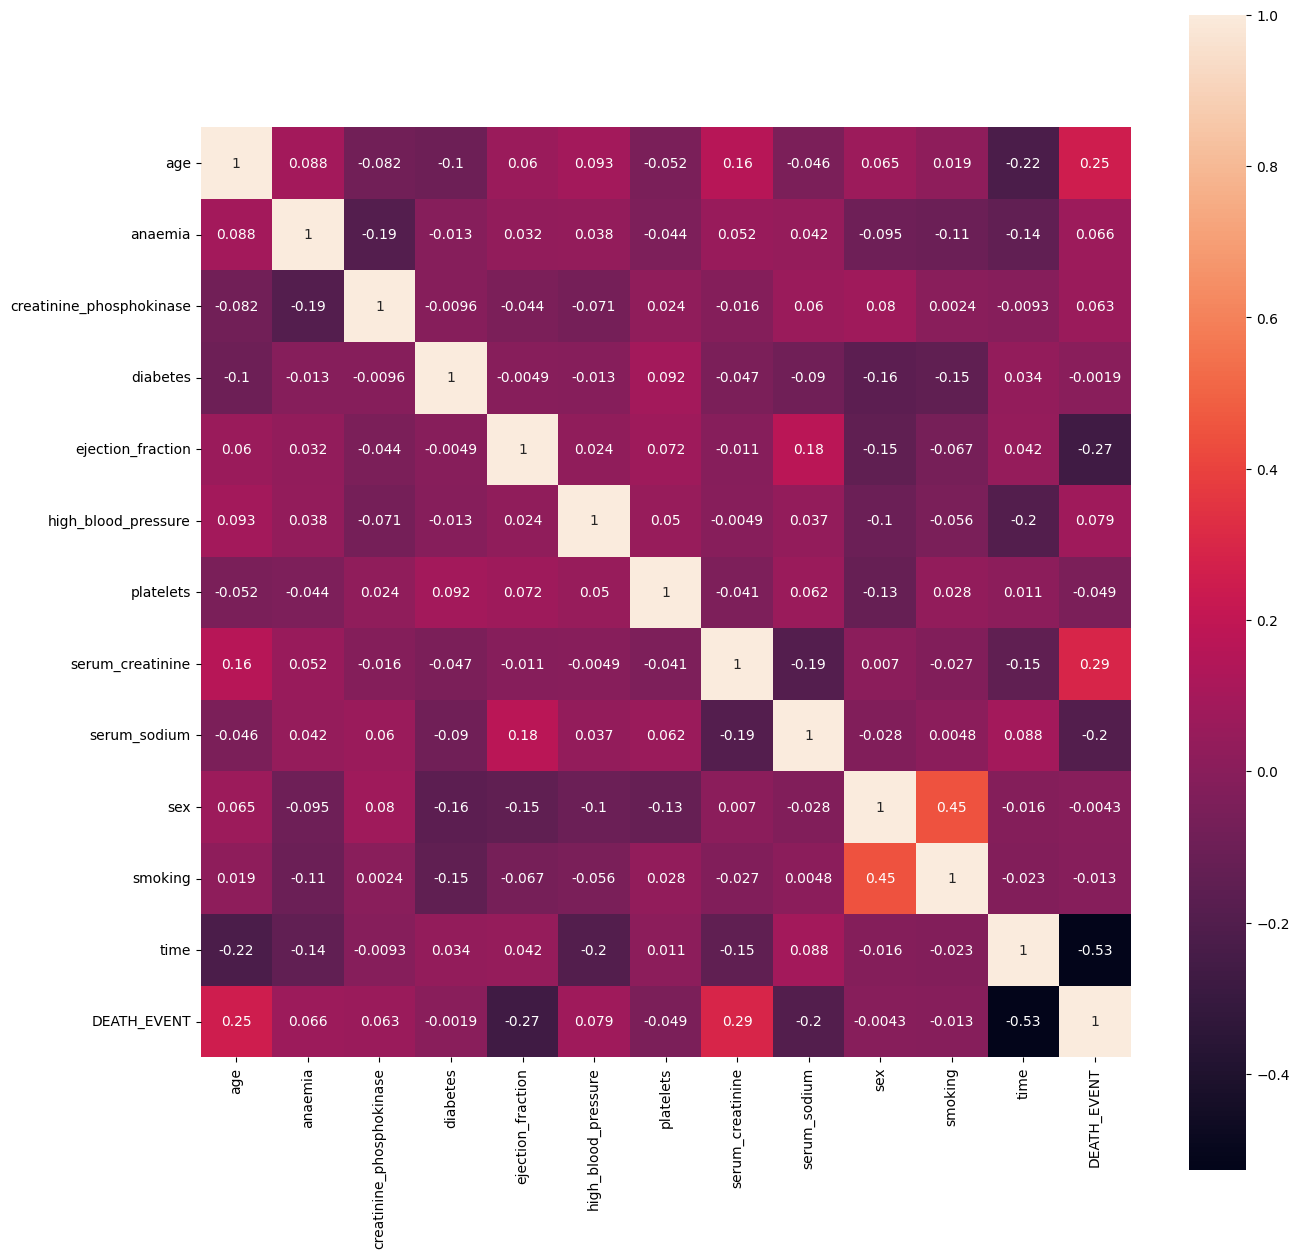

In [19]:
##Verify the correlation across features
corrmat = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,annot=True, square=True)
#cmap= cmap,

Four features has relatively high correlation with Death Event of Cardiovirsicular diease:
1. time(negative correlation)
2. serum_creatinine(positive correlation)
3. ejection_fraction(negative correlation)
4. age(positive correlation)

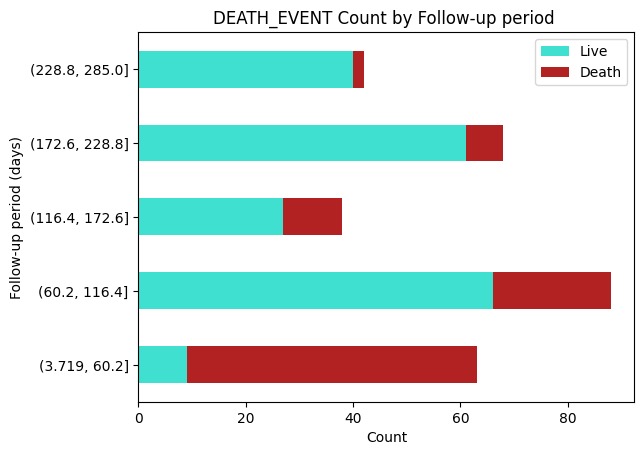

In [20]:
##bar plot of DEATH_EVENT count by Time
time_bins = pd.cut(df['time'], bins=5)
time = df.groupby([time_bins, 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack()
time.plot(kind='barh', stacked=True, color=['turquoise', 'firebrick'])
plt.title('DEATH_EVENT Count by Follow-up period ')
plt.xlabel('Count')
plt.ylabel('Follow-up period (days)')
plt.legend(['Live','Death'])
plt.show()

Patient with fewer follow-up period had high risk of death, which means the earlier diagnoise and long-term monitor would be help to reduce the risk.

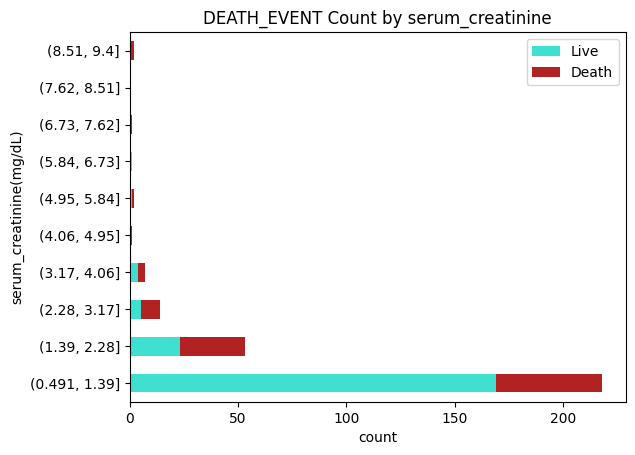

In [21]:
##bar plot of DEATH_EVENT count by serum_creatinine
serum_creatinine_bin = pd.cut(df['serum_creatinine'], bins=10)
serum_creatinine = df.groupby([serum_creatinine_bin, 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack()
serum_creatinine.plot(kind='barh', stacked=True, color=['turquoise', 'firebrick'])
plt.title('DEATH_EVENT Count by serum_creatinine')
plt.xlabel('count')
plt.ylabel('serum_creatinine(mg/dL)')
plt.legend(['Live','Death'])
plt.show()

Patient with higher serum creatinine would be more dangerous.

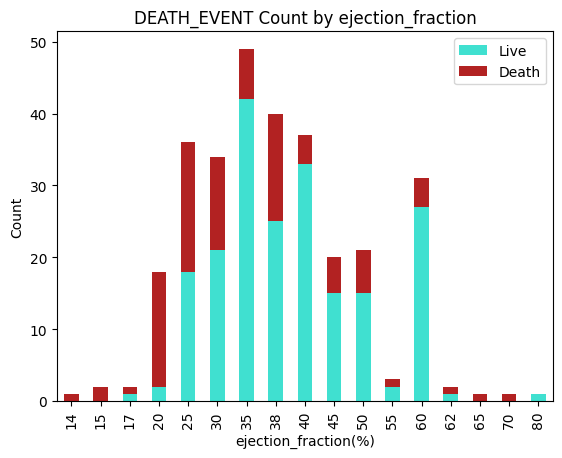

In [22]:
##bar plot of DEATH_EVENT count by ejection_fraction

grouped= df.groupby(['ejection_fraction', 'DEATH_EVENT']).size().unstack()

# Plot the bar chart
ejection_fraction = grouped.plot(kind='bar', stacked=True,color=['turquoise', 'firebrick'])

# Set the title and labels for the chart
plt.title('DEATH_EVENT Count by ejection_fraction')
plt.xlabel('ejection_fraction(%)')
plt.ylabel('Count')
plt.legend(['Live','Death'])
plt.show()



Patients with ejection fraction ranging from 30~60% would be safer.

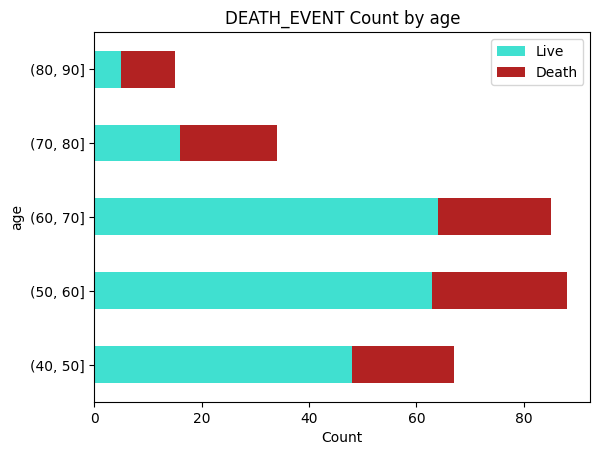

In [23]:
##bar plot of DEATH_EVENT count by age

age_bin = [40, 50, 60, 70, 80, 90]
age_groups = pd.cut(df['age'], bins=age_bin)
age = df.groupby([age_groups, 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack()
age.plot(kind='barh', stacked=True, color=['turquoise', 'firebrick'])
plt.title('DEATH_EVENT Count by age')
plt.xlabel('Count')
plt.ylabel('age')
plt.legend(['Live','Death'])
plt.show()

Older patients are under higher risk to death caused by cardiovascular disease.

## 3.Data preprocessing for model building

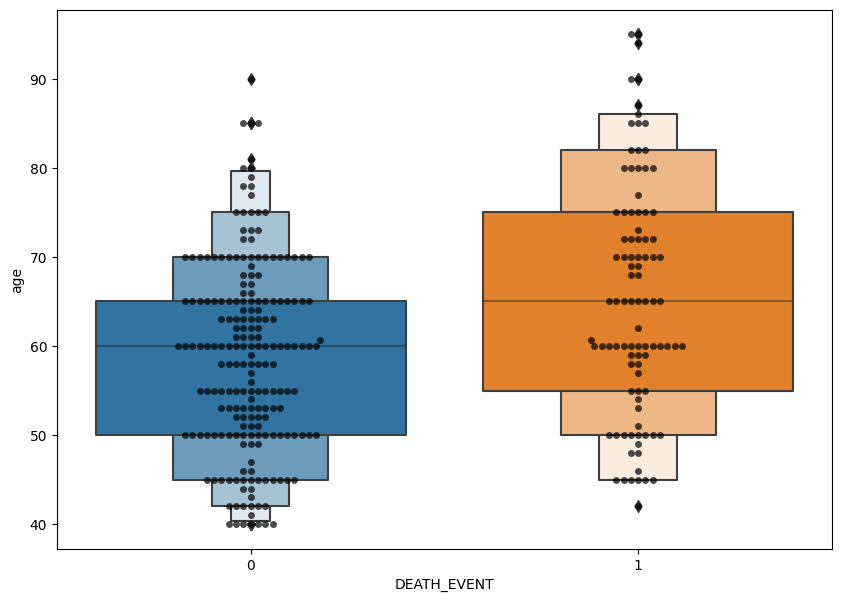

C:\Users\V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning:

13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



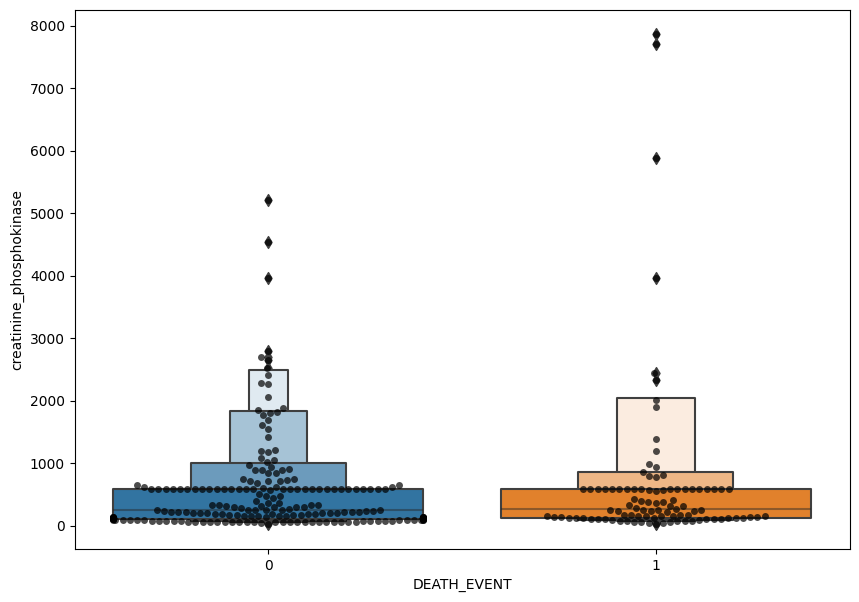

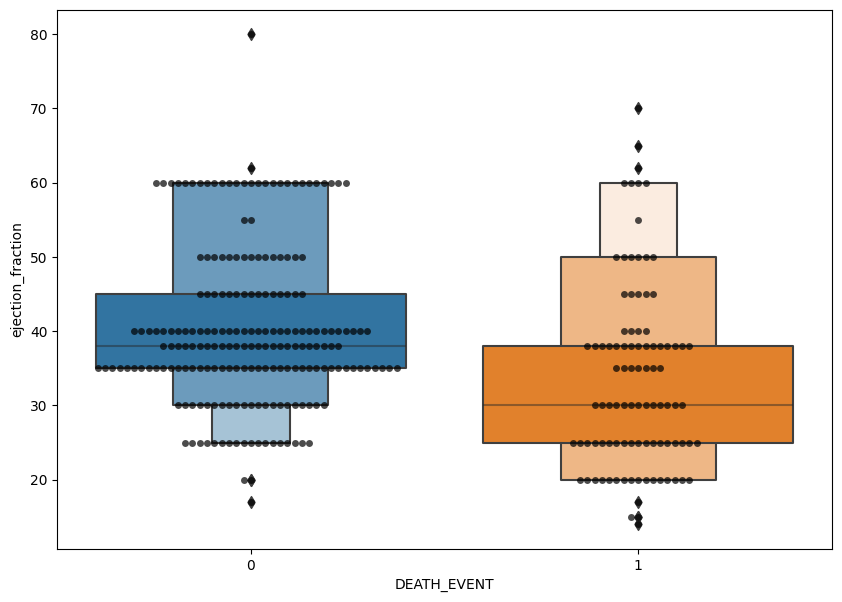

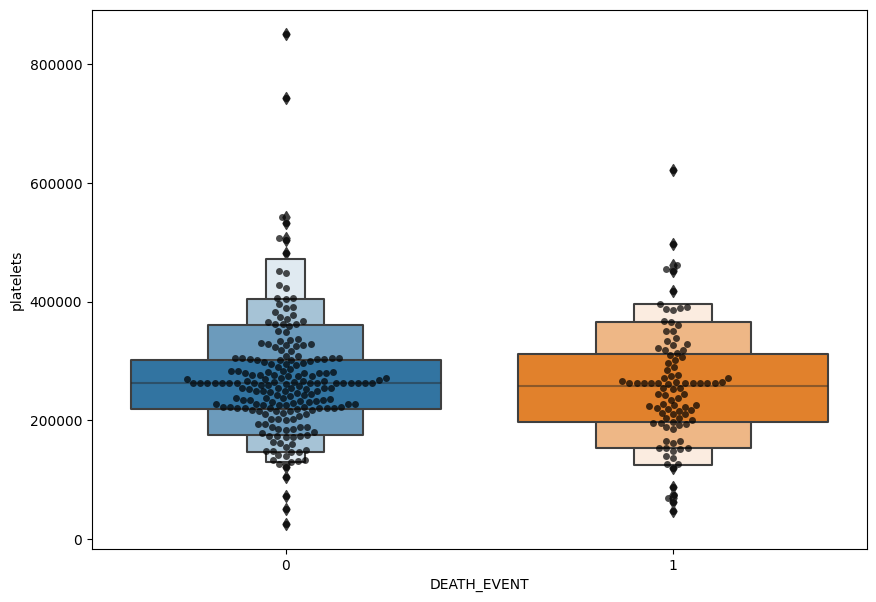

C:\Users\V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning:

10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



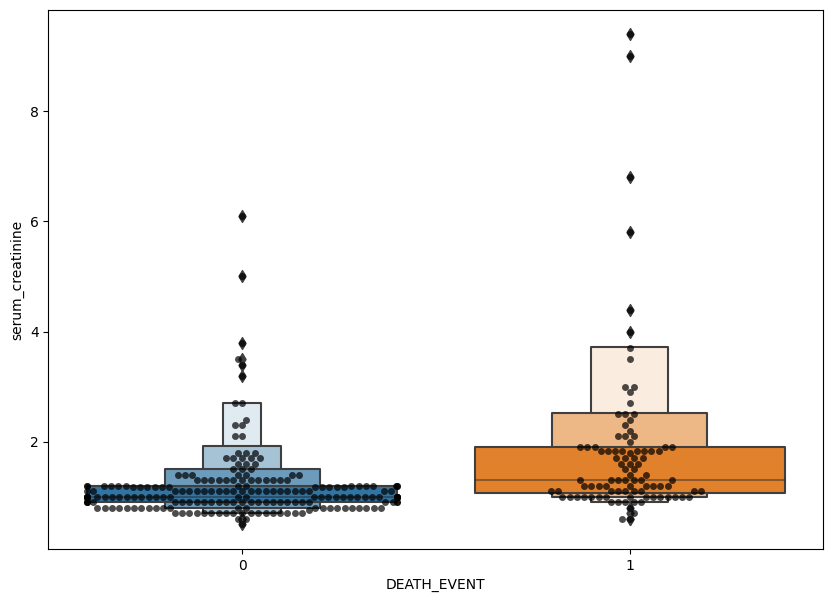

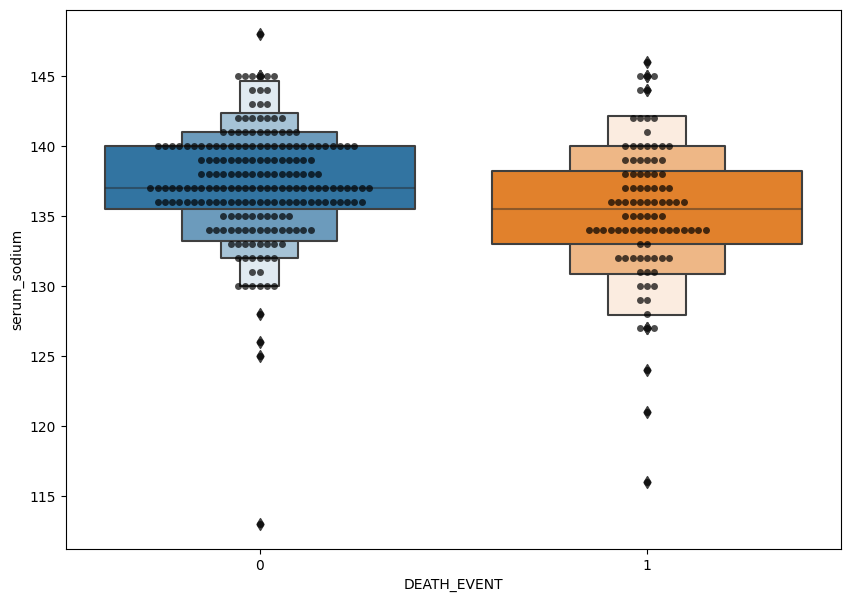

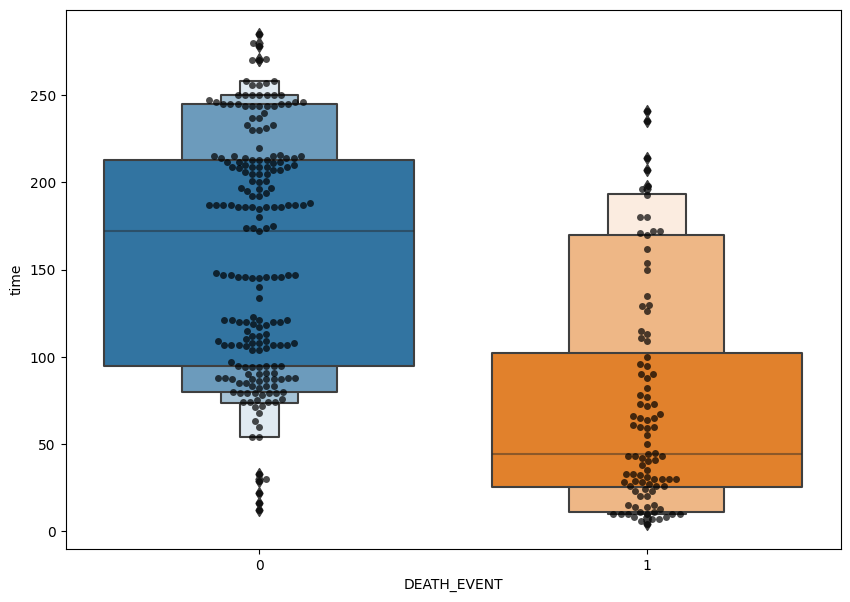

In [24]:
## check outlier
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=df["DEATH_EVENT"], y=df[i], color="black", alpha=0.7)
    sns.boxenplot(x=df["DEATH_EVENT"], y=df[i])
    plt.show() 

ANNs can be sensitive to outliers because they use a non-linear activation function, which can cause small changes in the input to result in large changes in the output. 

In [25]:
#remove outliers
for col in df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [26]:
# Defining independent and dependent attributes in training and test sets
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [27]:
# train, test, split -- training with 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [28]:
## Scaling of my data
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

# 4. Artificial Neural Network Model

In [29]:
##initialis the ANN
model=Sequential()

##set up the layers
#input layer
model.add(Dense(units=16, kernel_initializer='uniform',input_dim=12,activation='relu'))
#hidden layer
model.add(Dense(units=8, kernel_initializer='uniform',activation='relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

## compliling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
##train the model
history=model.fit(X_train,y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 2s 33ms/step - loss: 0.6920 - accuracy: 0.6346 - val_loss: 0.6907 - val_accuracy: 0.6716
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6876 - accuracy: 0.7500 - val_loss: 0.6871 - val_accuracy: 0.6716
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6813 - accuracy: 0.7500 - val_loss: 0.6820 - val_accuracy: 0.6716
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6737 - accuracy: 0.7500 - val_loss: 0.6741 - val_accuracy: 0.6716
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6598 - accuracy: 0.7500 - val_loss: 0.6602 - val_accuracy: 0.6716
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6406 - accuracy: 0.7500 - val_loss: 0.6393 - val_accuracy: 0.6716
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6124 - accuracy: 0.7500 - val_loss: 0.6119 - val_accuracy: 0.6716
Epoch 8/100


In [ ]:
## make prediction
y_pred_ann=model.predict(X_test)
y_pred_ann=np.where(y_pred_ann>0.5,1,0)
y_pred_ann=y_pred_ann.flatten()

3/3 [==============================] - 0s 3ms/step


In [ ]:
pd.DataFrame(({'Actual':y_test,'Predicted':y_pred_ann}))

,Actual,Predicted
260,0,0
24,1,1
125,0,0
92,0,0
67,1,1
...,...,...
239,0,0
161,0,0
266,1,0
118,0,0


In [ ]:
##classification report
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        45
           1       0.81      0.59      0.68        22

    accuracy                           0.82        67
   macro avg       0.82      0.76      0.78        67
weighted avg       0.82      0.82      0.81        67



In [ ]:
cm=confusion_matrix(y_test,y_pred_ann)
cm

array([[42,  3],
       [ 9, 13]], dtype=int64)

Text(0.5, 1.0, 'confusion_matrix')

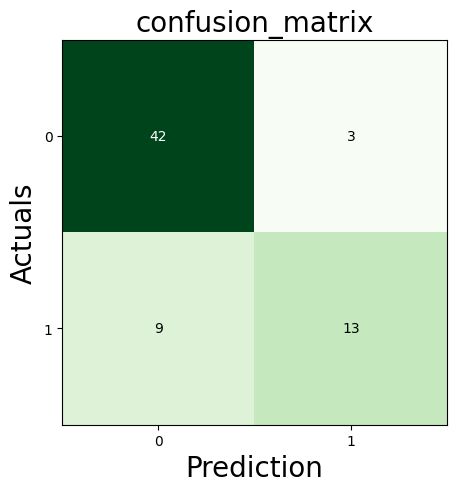

In [ ]:
## plot a confusion matrix
fig, ax=plot_confusion_matrix(conf_mat=cm,figsize=(5,5),cmap=plt.cm.Greens)
plt.xlabel('Prediction',fontsize=20)
plt.ylabel('Actuals',fontsize=20)
plt.title('confusion_matrix',fontsize=20)

Many False Negative

# 5. Deploy the prediction app

In [ ]:
##save the logistics regression model
import pickle
#Save the model to file
with open('ann_heart_model.pkl','wb') as file:
    pickle.dump(model,file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-24 15:10:59         2085
metadata.json                                  2023-02-24 15:10:59           64
variables.h5                                   2023-02-24 15:11:00        29096
